Aluno: Felipe Miranda Cardoso de Sá
<br> Matrícula: 201802677
<br> PDI - Processamento Digital de Imagens
<br> Professor: Cassio Denner

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#/content/drive/MyDrive/HistogramasPDI/imagens

Buscando as imagens que deixei salvas no meu Drive...


In [ ]:
# Leitura da imagem, alguns exemplos
#img = np.random.randint(0,255,(512,512),dtype=np.uint8) #img 512x512, uint8 aleatorios
#img = cv2.imread('/content/drive/MyDrive/HistogramasPDI/imagens/airfield-05small-auto.tif', cv2.IMREAD_GRAYSCALE) # tif, com perdas
img = cv2.imread('/content/drive/MyDrive/HistogramasPDI/imagens/lena.png', cv2.IMREAD_GRAYSCALE) # velha lena nunca falha, sem perdas, png

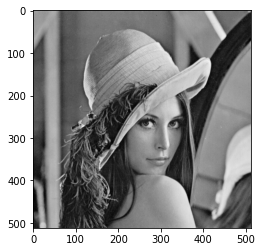

In [ ]:
plt.figure(0)
plt.imshow(img, cmap='gray') # especificar color map
#plt.axis('off')

In [ ]:
W, H = img.shape
print('Dimensões:',img.shape)
print('Tipo-Dados:',img.dtype)
print('Pixels:',W*H)
print('Tamanho:',W*H/1024)
import sys
print('Tam. Obj.:', sys.getsizeof(img)/1024)

Dimensões: (512, 512)
Tipo-Dados: uint8
Pixels: 262144
Tamanho: 256.0
Tam. Obj.: 256.1171875


In [ ]:
def computa_histograma(img):
    """Computa um histograma simples - veja em Burger/2016 e slides da aula de 04/08
    Args:
        img: WxH array de in teiros int. Imagem de entrada.
        
    Retorna:
        h: array numpy de 256 inteiros int. Histograma da imagem.
    """

    W, H = img.shape # pega largura e altura da imagem
    h = np.zeros(256, np.uint64) # inicializa h, inteiros maiores
    for v in range(0,H): 
        for u in range(0,W):
            i = img[u,v]
            h[i] = h[i]+1
    
    return h

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    1    8   24
   29   70   92  141  187  231  314  425  528  611  792  953 1076 1309
 1459 1663 1741 1882 2005 2083 2003 2095 2044 2047 1932 1836 1725 1659
 1543 1455 1292 1254 1160 1018  975  952  876  879  779  792  775  780
  848  809  823  785  870  912  849  887  934  941  905  916  853  945
  924  974  989 1022 1059 1125 1106 1225 1176 1333 1413 1553 1611 1783
 1858 2064 1937 1935 1941 1833 1771 1748 1578 1497 1463 1335 1363 1394
 1351 1438 1383 1352 1389 1453 1525 1529 1607 1772 1793 1842 2018 2105
 2277 2325 2337 2484 2396 2316 2210 2134 2045 1808 1977 1820 2044 2123
 2237 2268 2333 2415 2470 2396 2266 2335 2231 2242 2273 2327 2356 2566
 2716 2728 2626 2554 2370 2336 2061 1902 1748 1659 1467 1427 1358 1243
 1200 1245 1184 1129 1318 1297 1230 1186 1196 1205 1137  975  931  844
  786  696  649  622  623  689  665  640  736  794  802  926  912 1005
  905 

<BarContainer object of 256 artists>

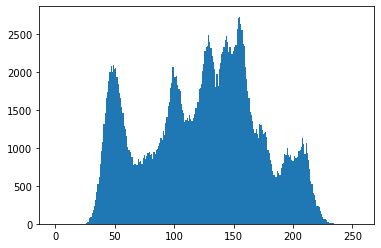

In [ ]:
# Histograma implementado
hist_computado=computa_histograma(img)
print(hist_computado)
#plt.bar(range(0, 256), hist_computado) # há distancia entre as barras, usar outros parametros e tirar bordas/distância
plt.bar(range(0, 256), hist_computado, linewidth=0, width=1) # testes, facecolor='black', edgecolor='black')

Histograma com bins de tamanho 32

In [ ]:
def computa_histograma2(img):
    B = 32
    k = 256
    W, H = img.shape

    h = np.zeros((B), np.uint64)
    for v in range(0,H):
        for u in range(0,W):
            
            a = img[u,v]
            i = a * B / k
            #print(i)
            #print(B)
            #if i >= B:
            #  h[B - 1] += 1
            #else:
            h[int(np.floor(i))] += 1
    return h

Comparação de Histogramas referentes a essa primeira imagem

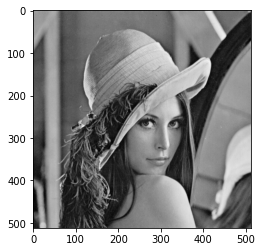

In [ ]:
plt.figure(0)
plt.imshow(img, cmap='gray'); # especificar color map

[    0     0     0   365  4041 13218 15341  9649  6538  7001  7528  9990
 14962 12149 11420 15739 17730 17217 18540 20252 12865  9789  7770  5418
  7174  7280  7216  2473   452    23     4     0]


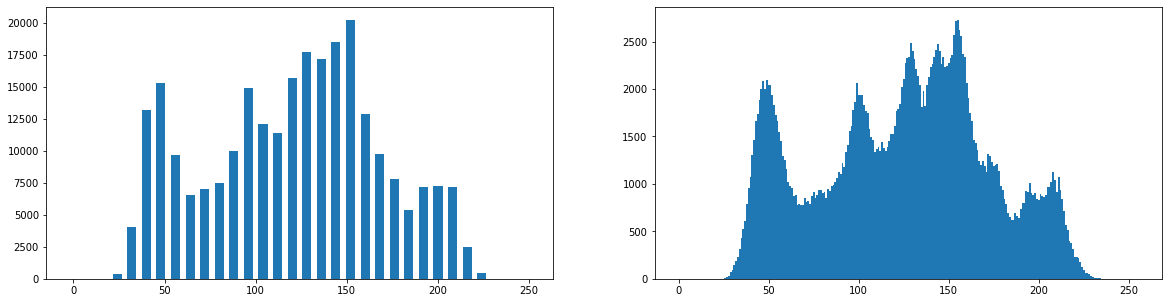

In [ ]:
from IPython.core.pylabtools import figsize
# Histograma implementado 2
hist_computado2=computa_histograma2(img)
print(hist_computado2)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))

ax1.bar(range(0, 256, 8), hist_computado2, linewidth=50, width=5); # testes, facecolor='black', edgecolor='black')
ax2.bar(range(0, 256), computa_histograma(img), linewidth=0, width=1);


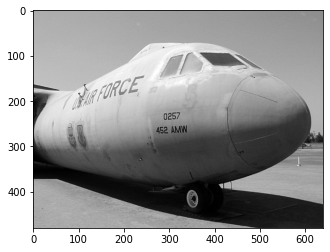

In [ ]:
img1 = cv2.imread('/content/drive/MyDrive/HistogramasPDI/imagens/airfield-05small-auto.tif', cv2.IMREAD_GRAYSCALE) # tif, com perdas

plt.figure(0)
plt.imshow(img1, cmap='gray'); # especificar color map

[ 7283 10965 10039 10508  4823  8067 12318  9367  6208  5832  5235  3274
  2787  2918  2968  3004  4432  6298 13334 26778 37825 35844 21339 13685
  7546  5114  5895  5622  6761  7064  3003  1064]


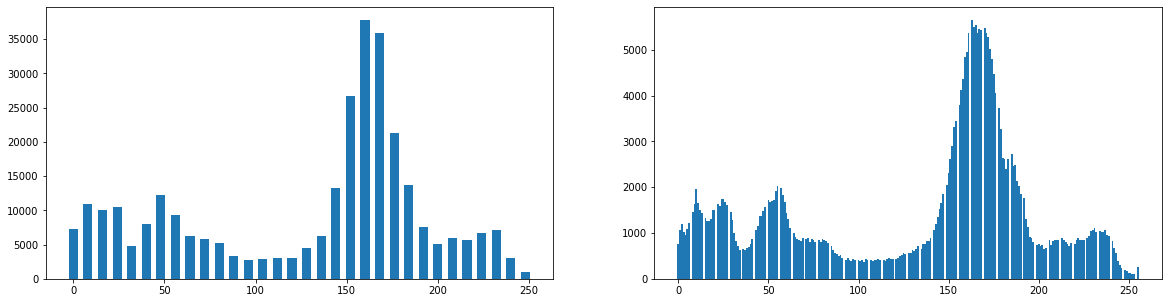

In [ ]:
hist_computado2=computa_histograma2(img1)
print(hist_computado2)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))

ax1.bar(range(0, 256, 8), hist_computado2, linewidth=50, width=5); # testes, facecolor='black', edgecolor='black')
ax2.bar(range(0, 256), computa_histograma(img1), linewidth=0, width=1);

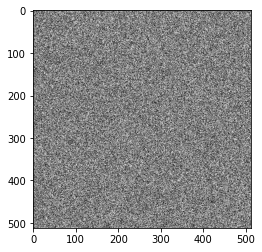

In [ ]:
img2 = np.random.randint(0,255,(512,512),dtype=np.uint8) #img 512x512, uint8 aleatorios]

plt.figure(0)
plt.imshow(img2, cmap='gray'); # especificar color map

[8137 8193 8236 8104 8195 8229 8109 8226 8336 8228 8229 8341 8201 8187
 8191 8250 8169 8216 8173 8265 8042 8405 8109 8286 8311 8351 8383 8275
 8046 8336 8176 7209]


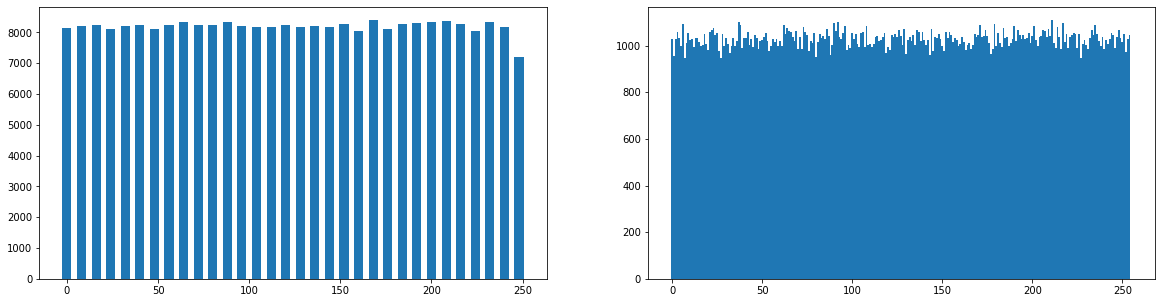

In [ ]:
hist_computado2=computa_histograma2(img2)
print(hist_computado2)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))

ax1.bar(range(0, 256, 8), hist_computado2, linewidth=50, width=5); # testes, facecolor='black', edgecolor='black')
ax2.bar(range(0, 256), computa_histograma(img2), linewidth=0, width=1);

Agora vamos fazer uma análise comparativa de uma mesma imagem

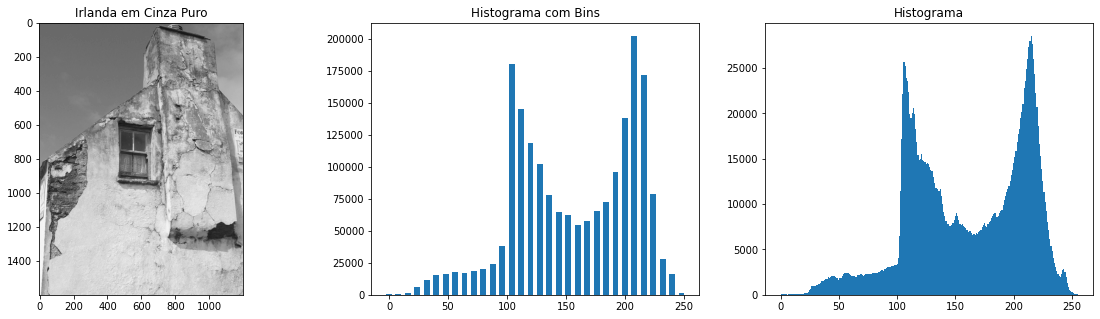

In [ ]:
ireland = cv2.imread('/content/drive/MyDrive/HistogramasPDI/imagens/ireland-06-gray.tif', cv2.IMREAD_GRAYSCALE) # tif, com perdas
hist_computado2=computa_histograma2(ireland)
#print(hist_computado2)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))

ax1.set_title('Irlanda em Cinza Puro')
ax2.set_title('Histograma com Bins')
ax3.set_title('Histograma')

ax1.imshow(ireland, cmap='gray');
ax2.bar(range(0, 256, 8), hist_computado2, linewidth=50, width=5); # testes, facecolor='black', edgecolor='black')
ax3.bar(range(0, 256), computa_histograma(ireland), linewidth=0, width=1);

Observando o Histograma sem Bins, podemos notar o efeito da compressão GIF

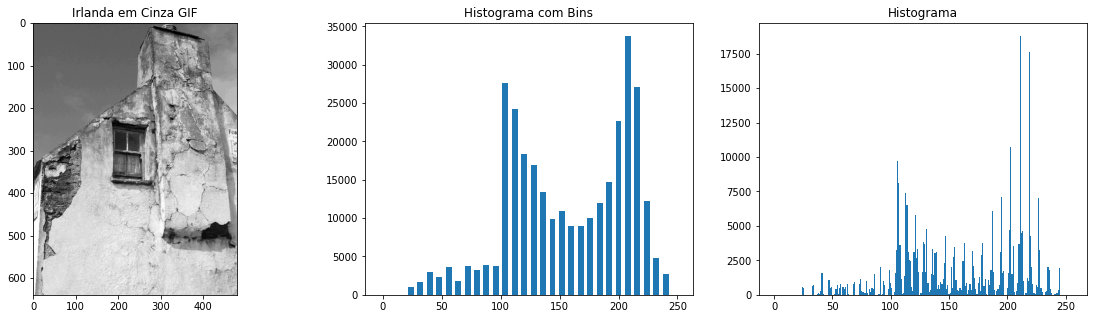

In [ ]:
ireland_gif = cv2.imread('/content/drive/MyDrive/HistogramasPDI/imagens/ireland-06-gif-gray.tif', cv2.IMREAD_GRAYSCALE) # tif, com perdas
hist_computado2=computa_histograma2(ireland_gif)
#print(hist_computado2)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))

ax1.set_title('Irlanda em Cinza GIF')
ax2.set_title('Histograma com Bins')
ax3.set_title('Histograma')

ax1.imshow(ireland_gif, cmap='gray');
ax2.bar(range(0, 256, 8), hist_computado2, linewidth=50, width=5); # testes, facecolor='black', edgecolor='black')
ax3.bar(range(0, 256), computa_histograma(ireland_gif), linewidth=0, width=1);

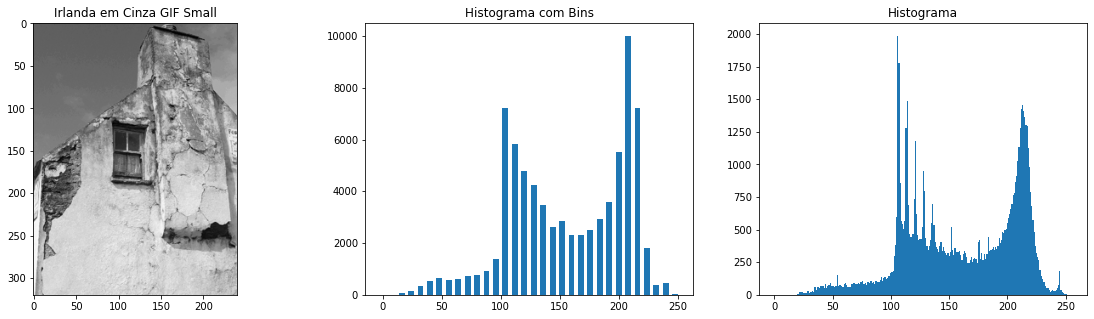

In [ ]:
ireland_gif_small = cv2.imread('/content/drive/MyDrive/HistogramasPDI/imagens/ireland-06-gif-gray-small.tif', cv2.IMREAD_GRAYSCALE) # tif, com perdas
hist_computado2=computa_histograma2(ireland_gif_small)
#print(hist_computado2)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))

ax1.set_title('Irlanda em Cinza GIF Small')
ax2.set_title('Histograma com Bins')
ax3.set_title('Histograma')

ax1.imshow(ireland_gif_small, cmap='gray');
ax2.bar(range(0, 256, 8), hist_computado2, linewidth=50, width=5); # testes, facecolor='black', edgecolor='black')
ax3.bar(range(0, 256), computa_histograma(ireland_gif_small), linewidth=0, width=1);

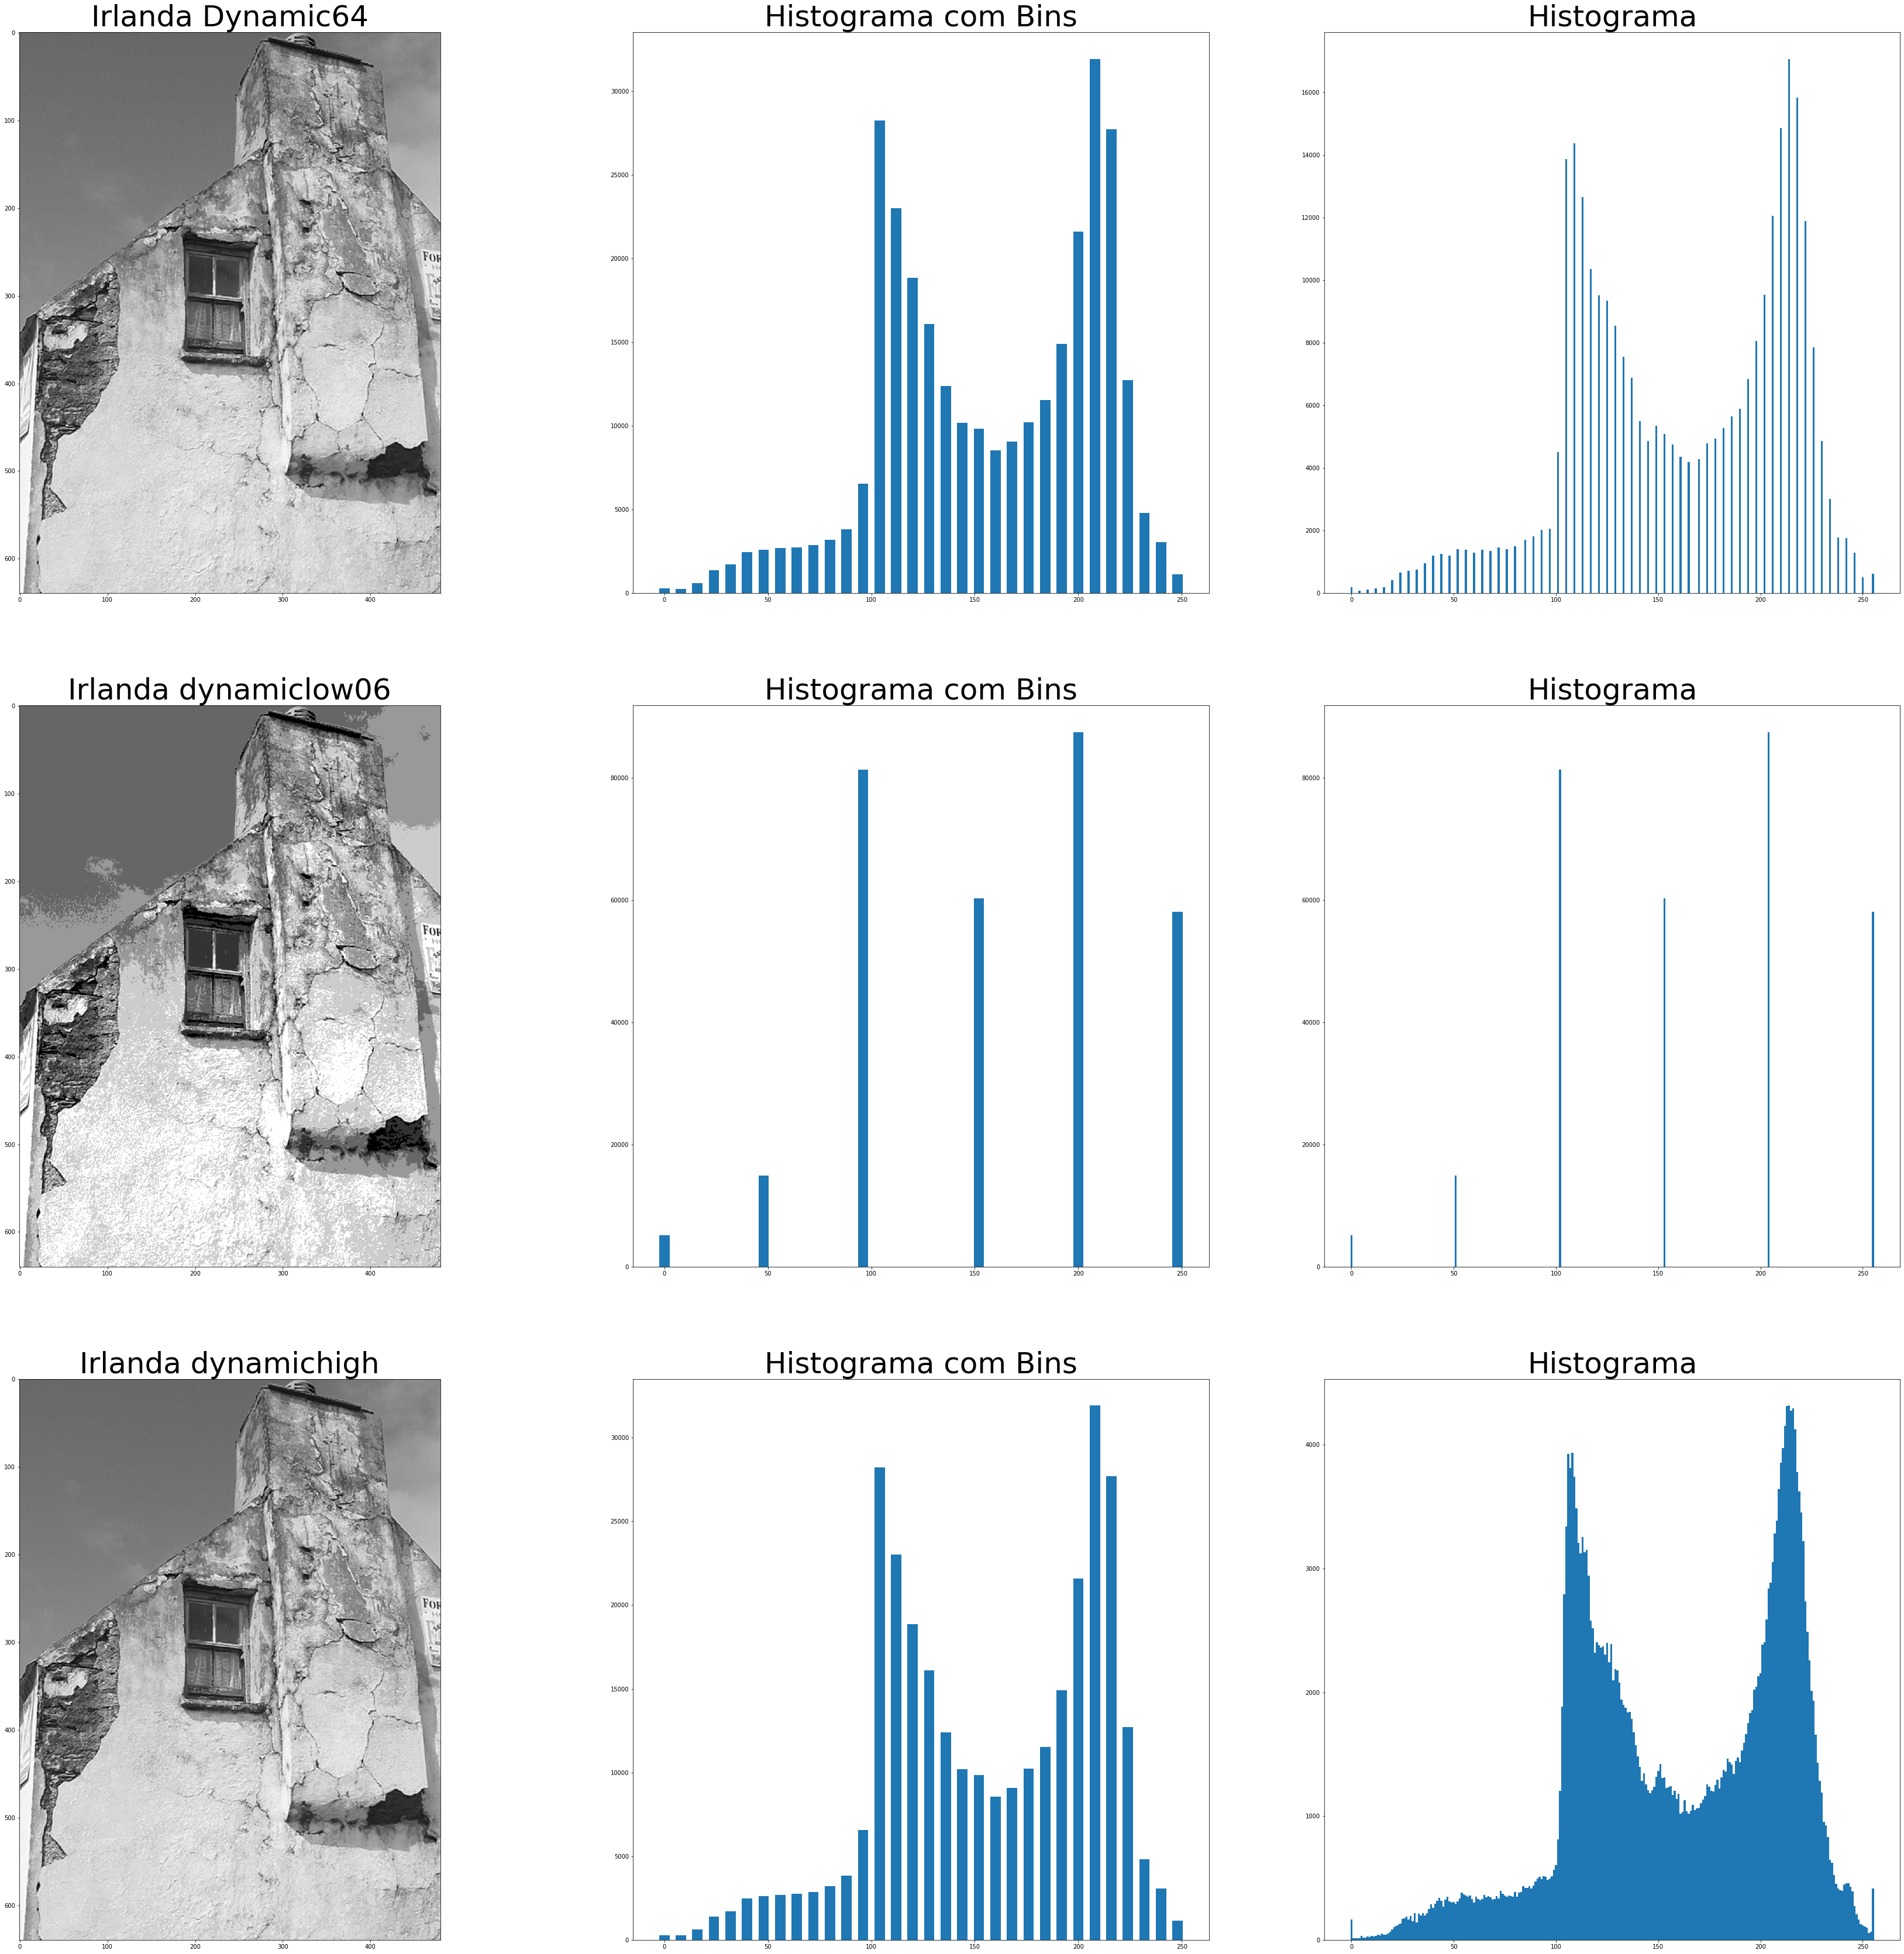

In [ ]:
ireland_dynamicmed64 = cv2.imread('/content/drive/MyDrive/HistogramasPDI/imagens/ireland-06-dynamicmed64.tif', cv2.IMREAD_GRAYSCALE) # tif, com perdas
ireland_dynamiclow06 = cv2.imread('/content/drive/MyDrive/HistogramasPDI/imagens/ireland-06-dynamiclow06.tif', cv2.IMREAD_GRAYSCALE)
ireland_dynamichigh = cv2.imread('/content/drive/MyDrive/HistogramasPDI/imagens/ireland-06-dynamichigh.tif', cv2.IMREAD_GRAYSCALE)


#print(hist_computado2)

fig, ax = plt.subplots(3, 3, figsize=(60,60))

ax[0, 0].set_title('Irlanda Dynamic64', fontdict={'fontsize': 50, 'fontweight': 'medium'})
ax[0, 1].set_title('Histograma com Bins', fontdict={'fontsize': 50, 'fontweight': 'medium'})
ax[0, 2].set_title('Histograma', fontdict={'fontsize': 50, 'fontweight': 'medium'})

ax[1, 0].set_title('Irlanda dynamiclow06', fontdict={'fontsize': 50, 'fontweight': 'medium'})
ax[1, 1].set_title('Histograma com Bins', fontdict={'fontsize': 50, 'fontweight': 'medium'})
ax[1, 2].set_title('Histograma', fontdict={'fontsize': 50, 'fontweight': 'medium'})

ax[2, 0].set_title('Irlanda dynamichigh', fontdict={'fontsize': 50, 'fontweight': 'medium'})
ax[2, 1].set_title('Histograma com Bins', fontdict={'fontsize': 50, 'fontweight': 'medium'})
ax[2, 2].set_title('Histograma', fontdict={'fontsize': 50, 'fontweight': 'medium'})

ax[0,0].imshow(ireland_dynamicmed64, cmap='gray');
ax[0,1].bar(range(0, 256, 8), computa_histograma2(ireland_dynamicmed64), linewidth=50, width=5);
ax[0,2].bar(range(0, 256), computa_histograma(ireland_dynamicmed64), linewidth=0, width=1)

ax[1,0].imshow(ireland_dynamiclow06, cmap='gray');
ax[1,1].bar(range(0, 256, 8), computa_histograma2(ireland_dynamiclow06), linewidth=50, width=5);
ax[1,2].bar(range(0, 256), computa_histograma(ireland_dynamiclow06), linewidth=0, width=1)

ax[2,0].imshow(ireland_dynamichigh, cmap='gray');
ax[2,1].bar(range(0, 256, 8), computa_histograma2(ireland_dynamichigh), linewidth=50, width=5);
ax[2,2].bar(range(0, 256), computa_histograma(ireland_dynamichigh), linewidth=0, width=1);



Com a análise notamos que o método Small Auto TIF possui perdas na imagem em determinadas faixas, mostrando faixas brancas (ausencias) no histograma

Notamos também que a foto 'Airfield' possui subexposição, tendo seu histograma deslocado para esquerda

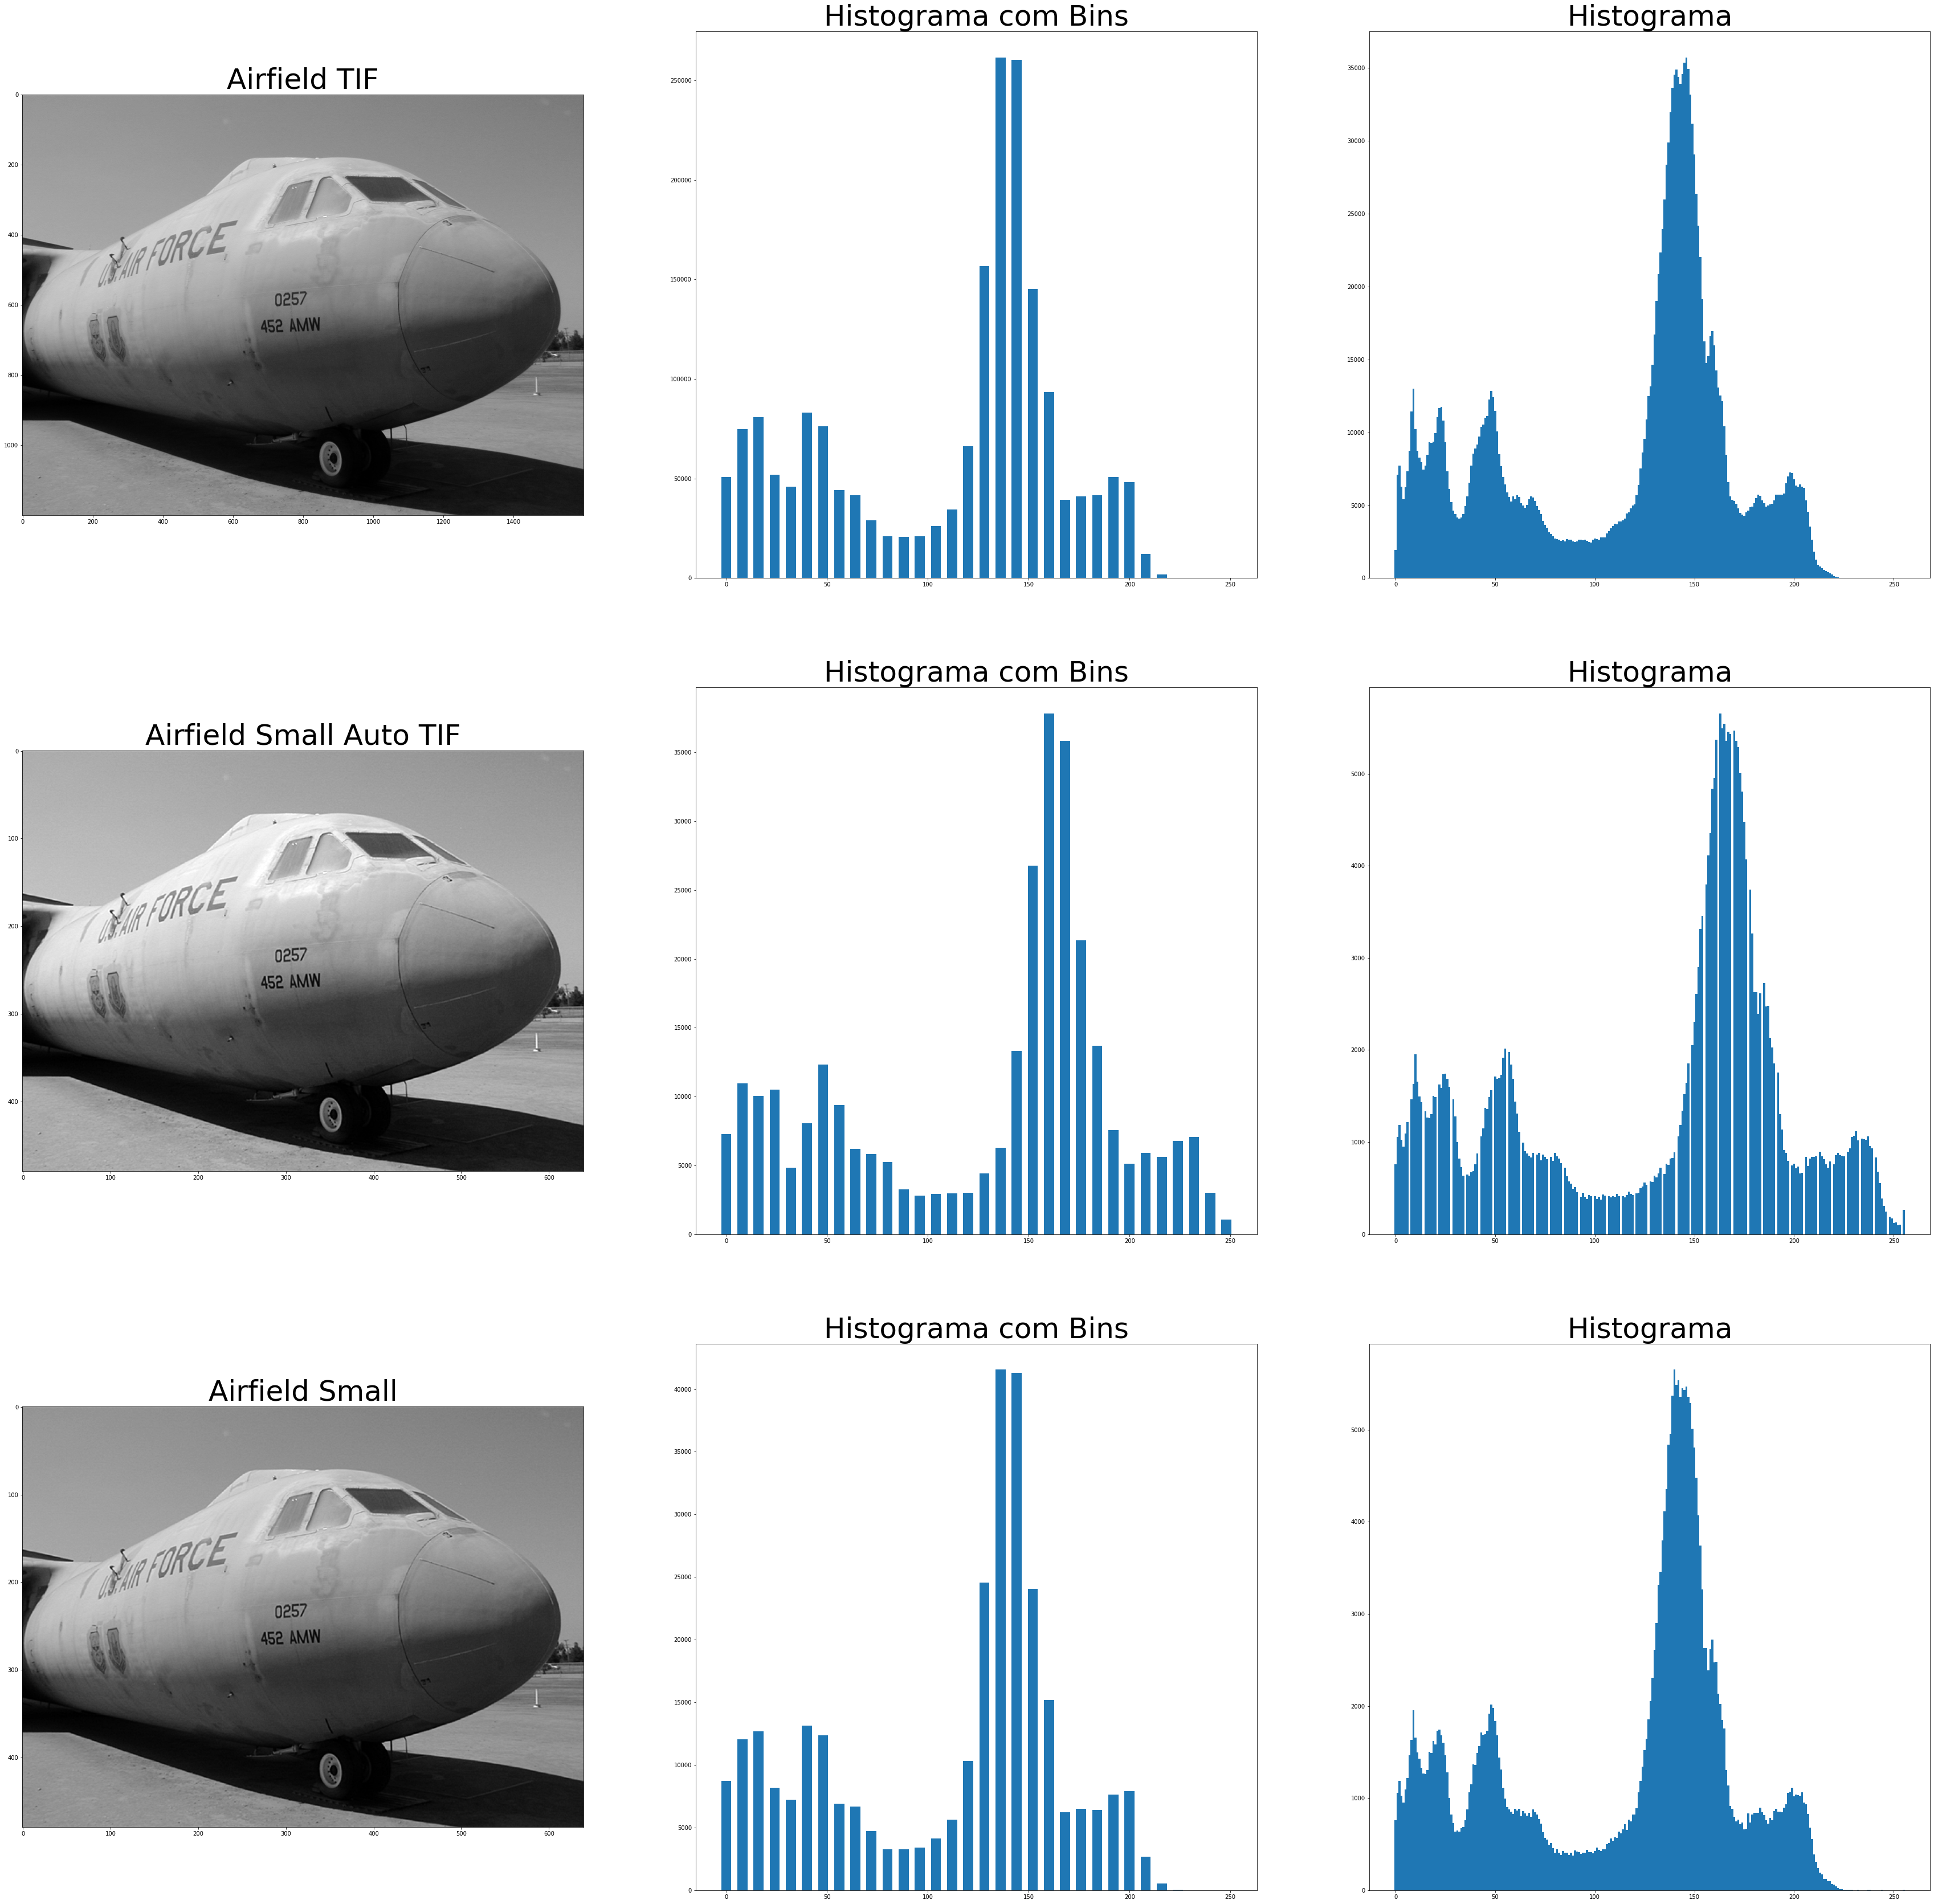

In [ ]:
airfield = cv2.imread('/content/drive/MyDrive/HistogramasPDI/imagens/airfield-05.tif', cv2.IMREAD_GRAYSCALE) # tif, com perdas
airfield_small_auto = cv2.imread('/content/drive/MyDrive/HistogramasPDI/imagens/airfield-05small-auto.tif', cv2.IMREAD_GRAYSCALE)
airfield_small = cv2.imread('/content/drive/MyDrive/HistogramasPDI/imagens/airfield-05small.tif', cv2.IMREAD_GRAYSCALE)


#print(hist_computado2)

fig, ax = plt.subplots(3, 3, figsize=(60,60))

ax[0, 0].set_title('Airfield TIF', fontdict={'fontsize': 50, 'fontweight': 'medium'})
ax[0, 1].set_title('Histograma com Bins', fontdict={'fontsize': 50, 'fontweight': 'medium'})
ax[0, 2].set_title('Histograma', fontdict={'fontsize': 50, 'fontweight': 'medium'})

ax[1, 0].set_title('Airfield Small Auto TIF', fontdict={'fontsize': 50, 'fontweight': 'medium'})
ax[1, 1].set_title('Histograma com Bins', fontdict={'fontsize': 50, 'fontweight': 'medium'})
ax[1, 2].set_title('Histograma', fontdict={'fontsize': 50, 'fontweight': 'medium'})

ax[2, 0].set_title('Airfield Small', fontdict={'fontsize': 50, 'fontweight': 'medium'})
ax[2, 1].set_title('Histograma com Bins', fontdict={'fontsize': 50, 'fontweight': 'medium'})
ax[2, 2].set_title('Histograma', fontdict={'fontsize': 50, 'fontweight': 'medium'})

ax[0,0].imshow(airfield, cmap='gray');
ax[0,1].bar(range(0, 256, 8), computa_histograma2(airfield), linewidth=50, width=5);
ax[0,2].bar(range(0, 256), computa_histograma(airfield), linewidth=0, width=1)

ax[1,0].imshow(airfield_small_auto, cmap='gray');
ax[1,1].bar(range(0, 256, 8), computa_histograma2(airfield_small_auto), linewidth=50, width=5);
ax[1,2].bar(range(0, 256), computa_histograma(airfield_small_auto), linewidth=0, width=1)

ax[2,0].imshow(airfield_small, cmap='gray');
ax[2,1].bar(range(0, 256, 8), computa_histograma2(airfield_small), linewidth=50, width=5);
ax[2,2].bar(range(0, 256), computa_histograma(airfield_small), linewidth=0, width=1);

In [ ]:
keth = cv2.imread('/content/drive/MyDrive/HistogramasPDI/imagens/keth_color.jpg', cv2.IMREAD_GRAYSCALE)

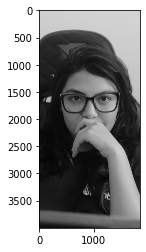

In [ ]:
plt.figure(0)
plt.imshow(keth, cmap='gray') # especificar color map
#plt.axis('off')

In [ ]:
W, H = keth.shape
print('Dimensões:',keth.shape)
print('Tipo-Dados:',keth.dtype)
print('Pixels:',W*H)
print('Tamanho:',W*H/1024)
import sys
print('Tam. Obj.:', sys.getsizeof(keth)/1024)

Dimensões: (4000, 1844)
Tipo-Dados: uint8
Pixels: 7376000
Tamanho: 7203.125
Tam. Obj.: 7203.2421875


In [139]:
from PIL import Image

basewidth = 1111
img = Image.open('/content/drive/MyDrive/HistogramasPDI/imagens/keth_color.jpg')
wpercent = (basewidth/float(img.size[0]))
print(wpercent)

hsize = int((float(img.size[1])*float(wpercent)))
print(hsize)
img = img.resize((basewidth,hsize), Image.ANTIALIAS)
img = img.rotate(angle= -90)
img.save('keth_convert.jpg')

0.27775
512


In [226]:
keth = cv2.imread('/content/keth_convert.jpg', cv2.IMREAD_GRAYSCALE)

In [227]:
keth


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

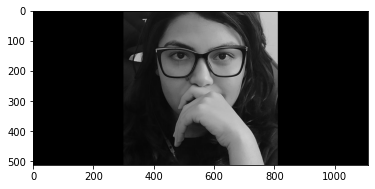

In [233]:
plt.figure(0)
plt.imshow(keth, cmap = 'gray') # especificar color map
#plt.axis('off')

In [234]:
W, H = keth.shape
print('Dimensões:',keth.shape)
print('Tipo-Dados:',keth.dtype)
print('Pixels:',W*H)
print('Tamanho:',W*H/1024)
import sys
print('Tam. Obj.:', sys.getsizeof(keth)/1024)

Dimensões: (512, 1111)
Tipo-Dados: uint8
Pixels: 568832
Tamanho: 555.5
Tam. Obj.: 555.6171875


In [200]:
keth = keth[:,300:]
new_keth = keth[:,:512]

In [201]:
new_keth.shape

(512, 512)

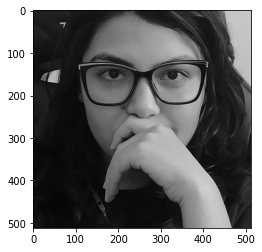

In [202]:
plt.figure(0)
plt.imshow(new_keth, cmap='gray') # especificar color map
#plt.axis('off')

In [209]:
#im = Image.fromarray(new_keth)
#im.save("/content/drive/MyDrive/HistogramasPDI/imagens/new_keth.jpeg")

Após analisarmos a foto, observamos nos histogramas uma subexposição

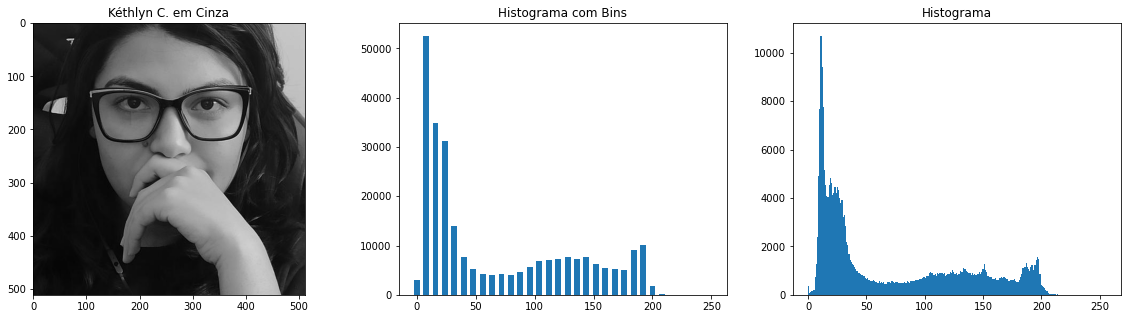

In [236]:
hist_computado2=computa_histograma2(new_keth)
#print(hist_computado2)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))

ax1.set_title('Kéthlyn C. em Cinza')
ax2.set_title('Histograma com Bins')
ax3.set_title('Histograma')

ax1.imshow(new_keth, cmap='gray');
ax2.bar(range(0, 256, 8), hist_computado2, linewidth=50, width=5); # testes, facecolor='black', edgecolor='black')
ax3.bar(range(0, 256), computa_histograma(new_keth), linewidth=0, width=1);